# Identifying SARS-CoV-2 targets for a CIRTS-based viral inhibition strategy
### 1. Import human-virus PPI network
##### Network taken from: 
Gordon, D. E. et al. A SARS-CoV-2 protein interaction map reveals targets for drug repurposing. Nature https://doi.org/10.1038/s41586-020-2286-9 (2020).

In [2]:
# imported packages
import json
import pandas as pd
import numpy as np
import ndex2
import networkx as nx
import matplotlib
import os

In [5]:
# import from ndex
hpi_map = ndex2.create_nice_cx_from_server('public.ndexbio.org', 'arholman', 'password', uuid=
'5d97a04a-6fab-11ea-bfdc-0ac135e8bacf')
hpi_map.print_summary()

Name: SARS-CoV-2 Host-Pathogen Interaction Map (Fig. 3))
Nodes: 359
Edges: 481
Node Attributes: 359
Edge Attributes: 3138



### 2. Import RNA targets with gene specificity

In [5]:
# potential RNA viral targets
cov_targ = os.path.join(os.environ["HOME"], "Dropbox/PhD UCSD/Coursework/Spring 2020/MED283/finalproj/", "sarscov2_conserved_unstructured.xlsx - sarscov2_conserved_unstructured.csv")
cov_raw = pd.read_csv(cov_targ, sep=",")
cov = cov_raw.iloc[0:78, 0:9]
cov

Name       Region  Length        Gene  \
0    SARS-CoV-2-conserved-unstructured-1  27359-27407      49  Orf6/Orf7a   
1    SARS-CoV-2-conserved-unstructured-2  25408-25442      35       Orf3a   
2    SARS-CoV-2-conserved-unstructured-3  15137-15175      39      Orf1ab   
3    SARS-CoV-2-conserved-unstructured-4    9497-9544      48      Orf1ab   
4    SARS-CoV-2-conserved-unstructured-5  29348-29394      47           N   
..                                   ...          ...     ...         ...   
73  SARS-CoV-2-conserved-unstructured-74    4551-4597      47      Orf1ab   
74  SARS-CoV-2-conserved-unstructured-75    7419-7453      35      Orf1ab   
75  SARS-CoV-2-conserved-unstructured-76    7337-7409      73      Orf1ab   
76  SARS-CoV-2-conserved-unstructured-77  23654-23721      68       Spike   
77  SARS-CoV-2-conserved-unstructured-78  15026-15082      57      Orf1ab   

      Nsp  Avg unpaired probability  Min unpaired probability  \
0     NaN                  0.828686                  0.645330   
1     NaN                  0.797974                  0.641586   
2   Nsp12                  0.800312                  0.622881   
3    Nsp4                  0.785620                  0.603424   
4     NaN                  0.922912                  0.602905   
..    ...                       ...                       ...   
73   Nsp3                  0.766988                  0.500261   
74   Nsp3                  0.714621                  0.500227   
75   Nsp3                  0.740859                  0.500083   
76    NaN                  0.815099                  0.500077   
77  Nsp12                  0.751956                  0.500069   

    Human off-targets                                           Sequence  
0                 NaN  ATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCT  
1                 NaN                AGAATCTTCACAATTGGAACTGTAACTTTGAAGCA  
2                 NaN            TGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAA  
3                 NaN   GTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGT  
4                 NaN    GCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAA  
..                ...                                                ...  
73                NaN    CAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACT  
74                NaN                TCTTCTTTGCATCATTTTATTATGTATGGAAAAGT  
75                NaN  TTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTAC...  
76                NaN  TCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTG...  
77                NaN  CATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCT...  

[78 rows x 9 columns]

### 3. Determine centrality of genes within human-CoV interactome

In [6]:
# make networkx object
hpi_map_networkx=hpi_map.to_networkx(mode='default')

# make it undirected
hpi_undirected = nx.Graph(hpi_map_networkx)

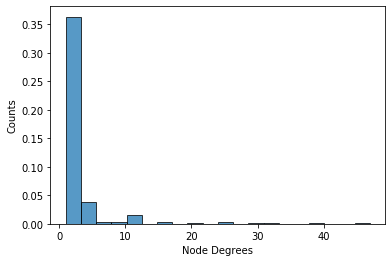

In [79]:
deg = hpi_undirected.degree

# pull all the node degrees
degree = []
for (x,y) in list(deg):
    degree.append(y)

# pull all unique node degrees for number of bins
uniq_degree = []
for u in degree:
    if u not in uniq_degree: 
        uniq_degree.append(u)

# plot node degrees vs. counts
plt.hist(degree, alpha=0.75, density=True, bins=(len(uniq_degree)), stacked=True, edgecolor='black')
plt.xlabel('Node Degrees')
plt.ylabel('Counts')
plt.show()

In [23]:
# determine centrality of proteins of interest
ec = nx.eigenvector_centrality(hpi_undirected)
bc = nx.betweenness_centrality(hpi_undirected)
dc = nx.degree_centrality(hpi_undirected)

In [24]:
# isolate eigenvector centrality
ec_prob = []
for key, value in ec.items():
    ec_prob.append(value)

# isolate betweenness centrality
bc_prob = []
for key, value in bc.items():
    bc_prob.append(value)

# isolate degree centrality
dc_prob = []
for key, value in dc.items():
    dc_prob.append(value) 

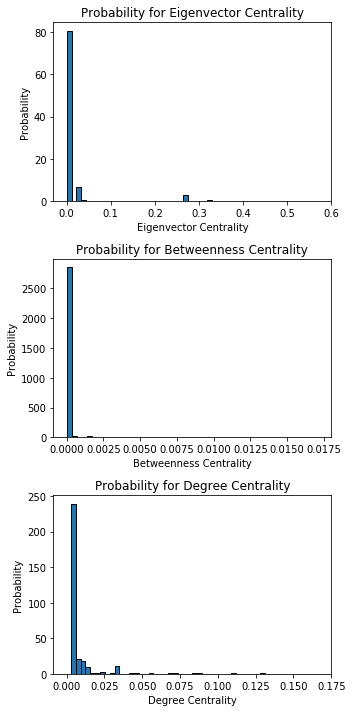

In [70]:
# plot centrality measures
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1, figsize=(5, 10), tight_layout=True)
axs[0].hist(ec_prob, bins=30, density=True, edgecolor='black')
axs[0].set_xlabel('Eigenvector Centrality')
axs[0].set_ylabel('Probability')
axs[0].set_title('Probability for Eigenvector Centrality')
a1 = 0.6
axs[0].set_xlim(left=-(a1/20), right=a1)

axs[1].hist(bc_prob, bins=50, density=True, edgecolor='black')
axs[1].set_xlabel('Betweenness Centrality')
axs[1].set_ylabel('Probability')
axs[1].set_title('Probability for Betweenness Centrality')
a2 = 0.018
axs[1].set_xlim(left=-(a2/20), right=a2)

axs[2].hist(dc_prob, bins=40, density=True, edgecolor='black')
axs[2].set_xlabel('Degree Centrality')
axs[2].set_ylabel('Probability')
axs[2].set_title('Probability for Degree Centrality')
a3 = 0.175
axs[2].set_xlim(left=-(a3/20), right=a3)

plt.show()

In [117]:
## find top hit by looking at degree and centrality
# highest degree value
for key, value in deg:
    if value == max(degree): 
        max_degree = key

node_atr = nx.get_node_attributes(hpi_map_networkx, 'name')
for key, value in node_atr.items():
    if key == max_degree:
        degree_gene = value

# highest ec value
for key, value in ec.items():
    if value == max(ec_prob): 
        max_ec = key
        
for key, value in node_atr.items():
    if key == max_ec:
        ec_gene = value

# highest bc value
for key, value in bc.items():
    if value == max(bc_prob): 
        max_bc = key
        
for key, value in node_atr.items():
    if key == max_bc:
        bc_gene = value
        
# highest dc value
for key, value in dc.items():
    if value == max(dc_prob): 
        max_dc = key
        
for key, value in node_atr.items():
    if key == max_dc:
        dc_gene = value

print("{} has the highest eigenvector centrality of {}.".format((ec_gene), (max(ec_prob))))
print("{} has the highest betweenness centrality of {}.".format((bc_gene), (max(bc_prob))))
print("{} has the highest degree centrality of {}.".format((dc_gene), (max(dc_prob))))
print("{} has the highest degree of {}.".format((degree_gene), (max(degree))))


Nsp13 has the highest eigenvector centrality of 0.32971863298233317.
Orf8 has the highest betweenness centrality of 0.016884966277013597.
Orf8 has the highest degree centrality of 0.13128491620111732.
Orf8 has the highest degree of 47.


In [128]:
## find top hits by looking at degree and centrality
# degree
sorted_degree = sorted(degree, reverse=True)
top_5_degree = sorted_degree[:5]

# ec
sorted_ec = sorted(ec_prob, reverse=True)
top_5_ec = sorted_ec[:5]

# bc
sorted_bc = sorted(bc_prob, reverse=True)
top_5_bc = sorted_bc[:5]

# dc
sorted_dc = sorted(dc_prob, reverse=True)
top_5_dc = sorted_dc[:5]

In [170]:
# highest degree value
max_degrees = []
for key, value in deg:
    if value in top_5_degree: 
        max_degrees.append(key)

degree_genes = []
for key, value in node_atr.items():
    if key in max_degrees:
        degree_genes.append(value)

# highest ec value
max_ecs = []
for key, value in ec.items():
    if value in top_5_ec: 
        max_ecs.append(key)

ec_genes = []
for key, value in node_atr.items():
    if key in max_ecs:
        ec_genes.append(value)

# highest bc value
max_bcs = []
for key, value in bc.items():
    if value in top_5_bc: 
        max_bcs.append(key)

bc_genes = []
for key, value in node_atr.items():
    if key in max_bcs:
        bc_genes.append(value)
        
# highest dc value
max_dcs = []
for key, value in dc.items():
    if value in top_5_dc: 
        max_dcs.append(key)

dc_genes = []
for key, value in node_atr.items():
    if key in max_dcs:
        dc_genes.append(value)

print("{}, {}, {}, {}, and {} have the highest degrees of {}, {}, {}, {}, and {}, respectively.\n".format(degree_genes[0], degree_genes[1], degree_genes[2], degree_genes[3], degree_genes[4], deg[max_degrees[0]], deg[max_degrees[1]], deg[max_degrees[2]], deg[max_degrees[3]], deg[max_degrees[4]]))
print("{} have the eigenvector centrality of {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {} and {}, respectively.\n".format(ec_genes[0:13], ec[max_ecs[0]], ec[max_ecs[1]], ec[max_ecs[2]], ec[max_ecs[3]], ec[max_ecs[4]], ec[max_ecs[5]], ec[max_ecs[6]], ec[max_ecs[7]], ec[max_ecs[8]], ec[max_ecs[9]], ec[max_ecs[10]], ec[max_ecs[11]], ec[max_ecs[12]]))
print("{} have the highest betweenness centrality of {}, {}, {}, {}, and {}, respectively.\n".format((bc_genes), bc[max_bcs[0]], bc[max_bcs[1]], bc[max_bcs[2]], bc[max_bcs[3]], bc[max_bcs[4]]))
print("{} have the highest degree centrality of {}, {}, {}, {}, and {}, respectively.".format((dc_genes), dc[max_dcs[0]], dc[max_dcs[1]], dc[max_dcs[2]], dc[max_dcs[3]], dc[max_dcs[4]]))


M, Nsp13, Nsp7, Orf8, and Orf9c have the highest degrees of 30, 40, 32, 47, and 26, respectively.

['Nsp13', 'PCNT', 'CEP43', 'CENPF', 'CEP350', 'CEP135', 'CEP68', 'CNTRL', 'NIN', 'CEP112', 'CDK5RAP2', 'CEP250', 'NINL'] have the eigenvector centrality of 0.32971863298233317, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083, 0.26894887014996083 and 0.26894887014996083, respectively.

['M', 'Nsp13', 'Nsp7', 'Orf8', 'Orf9c'] have the highest betweenness centrality of 0.006791543433015664, 0.011021913420861826, 0.007746115205858879, 0.016884966277013597, and 0.0050545357807927635, respectively.

['M', 'Nsp13', 'Nsp7', 'Orf8', 'Orf9c'] have the highest degree centrality of 0.08379888268156425, 0.111731843575419, 0.0893854748603352, 0.13128491620111732, and 0.07262569832402235, respectively.


In [394]:
# first, sort centrality lists by value
sort_ec = sorted(ec.items(), key=lambda x: x[1], reverse=True)
sort_bc = sorted(bc.items(), key=lambda x: x[1], reverse=True)
sort_dc = sorted(dc.items(), key=lambda x: x[1], reverse=True)

# generate scores for each centrality measure where 0 is a top score
score_ec = []
for i in range(len(sort_ec)):
    new = list(sort_ec[i])
    new.append(i)
    score_ec.append(new)
    
score_bc = []
for i in range(len(sort_bc)):
    new = list(sort_bc[i])
    new.append(i)
    score_bc.append(new)
    
score_dc = []
for i in range(len(sort_dc)):
    new = list(sort_dc[i])
    new.append(i)
    score_dc.append(new)

# now, sort by node index
sort_ec = sorted(score_ec, key=lambda x: x[0], reverse=True)
sort_bc = sorted(score_bc, key=lambda x: x[0], reverse=True)
sort_dc = sorted(score_dc, key=lambda x: x[0], reverse=True)

# merge all centrality scores by node index
final = []
for i in range(len(sort_ec)):
    new = list(sort_ec[i])
    new.append(sort_bc[i][2])
    final.append(new)
    
lists = []    
for i in range(len(sort_ec)):
    new = final[i]
    new.append(sort_dc[i][2])
    lists.append(new)  

# sum scores to get overall rankins
scores = []
for i in range(len(lists)):
    new = list(lists[i])
    new.append(sum(lists[i][2:5]))
    scores.append(new)

    
# sort by these final scores and generate list with rankings
sorted_scores = sorted(scores, key=lambda x: x[5])

final_score = []
for i in range(len(sorted_scores)):
    new = list(sorted_scores[i])
    new.append(node_atr[sorted_scores[i][0]])
    final_score.append(new)

final_scores = []
for i in range(len(final_score)):
    new = list([final_score[i][6], final_score[i][5], final_score[i][0]])
    new.append(i)
    final_scores.append(new)


In [393]:
## only select genes that are in our RNA target list
# first, finding unique genes that RNA targets
unique_genes = []
for g in cov.loc[:,"Gene"]:
    if g not in unique_genes: unique_genes.append(g)
        
for g in cov.loc[:,"Nsp"]:
    if g not in unique_genes: unique_genes.append(g)

# next, see order among genes on RNA targets
RNA_target_ranking = []
for i in range(len(final_scores)):
    if final_scores[i][0] in unique_genes:
        new = list([final_scores[i][0], final_scores[i][2], final_scores[i][3], final_scores[i][1]])
        RNA_target_ranking.append(new)

RNA_target_ranking

[['Nsp13', 2541, 0, 2],
 ['M', 2627, 5, 97],
 ['Nsp8', 2433, 6, 99],
 ['Nsp9', 2408, 7, 120],
 ['Nsp12', 2562, 28, 240],
 ['N', 2596, 29, 245],
 ['Nsp4', 2484, 33, 295],
 ['Nsp1', 2577, 39, 316],
 ['Orf3a', 2381, 50, 331],
 ['Nsp2', 2492, 62, 349],
 ['Nsp10', 2570, 67, 356],
 ['Nsp6', 2470, 77, 367],
 ['Nsp14', 2500, 121, 424],
 ['Nsp15', 2496, 124, 427],
 ['Orf7a', 2366, 137, 475],
 ['Spike', 2580, 158, 498],
 ['Nsp5', 2475, 307, 743]]

## 4. Add in BioPlex Network to the Human-CoV Dataset
##### Network taken from:
Huttlin, Edward L., et al. "Architecture of the Human Interactome Defines Protein Communities and Disease Networks." Nature 545.7655 (2017): 505-09.

In [8]:
bioplex = ndex2.create_nice_cx_from_server('public.ndexbio.org', uuid=
'98ba6a19-586e-11e7-8f50-0ac135e8bacf')
bioplex.print_summary()

Name: BioPlex 2.0 ( ~ 56,000 interactions )
Nodes: 10961
Edges: 56553
Node Attributes: 10961
Edge Attributes: 169659



In [9]:
# make networkx object from BioPlex network
bioplex_networkx_directed=bioplex.to_networkx(mode='default')

# make undirected
bioplex_nx = nx.MultiGraph(bioplex_networkx_directed)

### 4.1 1st degree neighbors
Here, we took the first degree neighbors of the human-CoV dataset in the BioPlex network

In [669]:
def trim(G, seed):
    node_atr = nx.get_node_attributes(G, 'name')
    new_graph = []
    neigh_list = []

    # if seed protein is found, find neighbors
    for key, value in node_atr.items():
        if value == seed:
            neigh = nx.neighbors(G, key)
            neigh_list = [n for n in neigh]
    
    # add neighbors to [new_graph]
    for n in neigh_list:
        new_graph.append(n)
                    
    # copy network
    G2 = G.copy()
    
    # remove nodes not in list
    nodes_for_removal = []
    
    for node in G2.nodes():
        if node not in new_graph:
            nodes_for_removal.append(node)
            
    G2.remove_nodes_from(nodes_for_removal)
    
    # gives the new subgraph
    return G2

# pull values to find neighbors for
hpi_node_atr = nx.get_node_attributes(hpi_map_networkx, 'name')
values = []
for key, value in hpi_node_atr.items():
    values.append(value)

# make a merged networkx graph of all neighbors
new = nx.empty_graph(0,create_using=nx.MultiDiGraph())
for v in values:
    subgraph = trim(bioplex_networkx_directed, v)
    new = nx.compose(new, subgraph)  

In [670]:
# merge bioplex neighbors with hpi network
hpi_bioplex = nx.compose(new, hpi_map_networkx)

# make it undirected
hpi_undirected = nx.Graph(hpi_bioplex)

### 4.2 Calculated centrality for first degree neighbors

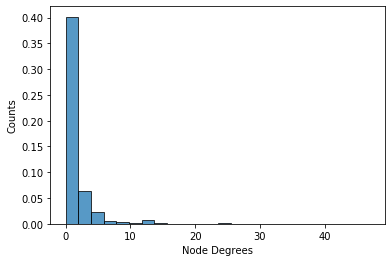

In [13]:
deg = hpi_undirected.degree

# pull all the node degrees
degree = []
for (x,y) in list(deg):
    degree.append(y)

# pull all unique node degrees for number of bins
uniq_degree = []
for u in degree:
    if u not in uniq_degree: 
        uniq_degree.append(u)

# plot node degrees vs. counts
plt.hist(degree, alpha=0.75, density=True, bins=(len(uniq_degree)), stacked=True, edgecolor='black')
plt.xlabel('Node Degrees')
plt.ylabel('Counts')
plt.show()

In [14]:
# determine centrality of proteins of interest
ec = nx.eigenvector_centrality(hpi_undirected)
bc = nx.betweenness_centrality(hpi_undirected)
dc = nx.degree_centrality(hpi_undirected)

# isolate eigenvector centrality
ec_prob = []
for key, value in ec.items():
    ec_prob.append(value)

# isolate betweenness centrality
bc_prob = []
for key, value in bc.items():
    bc_prob.append(value)

# isolate degree centrality
dc_prob = []
for key, value in dc.items():
    dc_prob.append(value) 

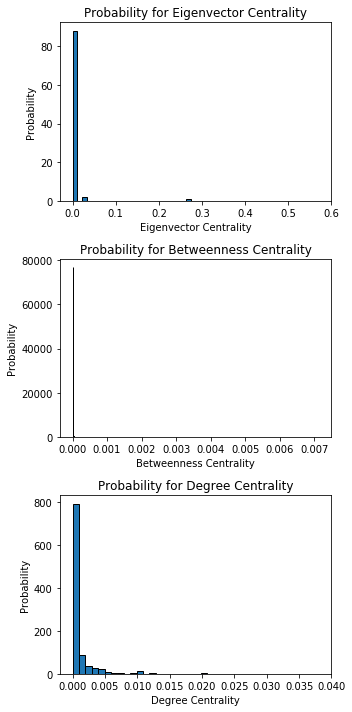

In [15]:
# plot centrality measures
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1, figsize=(5, 10), tight_layout=True)
axs[0].hist(ec_prob, bins=30, density=True, edgecolor='black')
axs[0].set_xlabel('Eigenvector Centrality')
axs[0].set_ylabel('Probability')
axs[0].set_title('Probability for Eigenvector Centrality')
a1 = 0.6
axs[0].set_xlim(left=-(a1/20), right=a1)

axs[1].hist(bc_prob, bins=300, density=True, edgecolor='black')
axs[1].set_xlabel('Betweenness Centrality')
axs[1].set_ylabel('Probability')
axs[1].set_title('Probability for Betweenness Centrality')
a2 = 0.0075
axs[1].set_xlim(left=-(a2/20), right=a2)

axs[2].hist(dc_prob, bins=40, density=True, edgecolor='black')
axs[2].set_xlabel('Degree Centrality')
axs[2].set_ylabel('Probability')
axs[2].set_title('Probability for Degree Centrality')
a3 = 0.04
axs[2].set_xlim(left=-(a3/20), right=a3)

plt.show()

In [16]:
## find top hit by looking at degree and centrality
# highest degree value
for key, value in deg:
    if value == max(degree): 
        max_degree = key

node_atr = nx.get_node_attributes(hpi_bioplex, 'name')
for key, value in node_atr.items():
    if key == max_degree:
        degree_gene = value

# highest ec value
for key, value in ec.items():
    if value == max(ec_prob): 
        max_ec = key
        
for key, value in node_atr.items():
    if key == max_ec:
        ec_gene = value

# highest bc value
for key, value in bc.items():
    if value == max(bc_prob): 
        max_bc = key
        
for key, value in node_atr.items():
    if key == max_bc:
        bc_gene = value
        
# highest dc value
for key, value in dc.items():
    if value == max(dc_prob): 
        max_dc = key
        
for key, value in node_atr.items():
    if key == max_dc:
        dc_gene = value

print("{} has the highest eigenvector centrality of {}.".format((ec_gene), (max(ec_prob))))
print("{} has the highest betweenness centrality of {}.".format((bc_gene), (max(bc_prob))))
print("{} has the highest degree centrality of {}.".format((dc_gene), (max(dc_prob))))
print("{} has the highest degree of {}.".format((degree_gene), (max(degree))))

Nsp13 has the highest eigenvector centrality of 0.3297185020828324.
Nsp7 has the highest betweenness centrality of 0.0036537380550871277.
Orf8 has the highest degree centrality of 0.03962900505902192.
Orf8 has the highest degree of 47.


In [17]:
# first, sort centrality lists by value
sort_ec = sorted(ec.items(), key=lambda x: x[1], reverse=True)
sort_bc = sorted(bc.items(), key=lambda x: x[1], reverse=True)
sort_dc = sorted(dc.items(), key=lambda x: x[1], reverse=True)

# generate scores for each centrality measure where 0 is a top score
score_ec = []
for i in range(len(sort_ec)):
    new = list(sort_ec[i])
    new.append(i)
    score_ec.append(new)
    
score_bc = []
for i in range(len(sort_bc)):
    new = list(sort_bc[i])
    new.append(i)
    score_bc.append(new)
    
score_dc = []
for i in range(len(sort_dc)):
    new = list(sort_dc[i])
    new.append(i)
    score_dc.append(new)

# now, sort by node index
sort_ec = sorted(score_ec, key=lambda x: x[0], reverse=True)
sort_bc = sorted(score_bc, key=lambda x: x[0], reverse=True)
sort_dc = sorted(score_dc, key=lambda x: x[0], reverse=True)

# merge all centrality scores by node index
final = []
for i in range(len(sort_ec)):
    new = list(sort_ec[i])
    new.append(sort_bc[i][2])
    final.append(new)
    
lists = []    
for i in range(len(sort_ec)):
    new = final[i]
    new.append(sort_dc[i][2])
    lists.append(new)  

# sum scores to get overall rankins
scores = []
for i in range(len(lists)):
    new = list(lists[i])
    new.append(sum(lists[i][2:5]))
    scores.append(new)

    
# sort by these final scores and generate list with rankings
sorted_scores = sorted(scores, key=lambda x: x[5])

final_score = []
for i in range(len(sorted_scores)):
    new = list(sorted_scores[i])
    new.append(node_atr[sorted_scores[i][0]])
    final_score.append(new)

final_scores = []
for i in range(len(final_score)):
    new = list([final_score[i][6], final_score[i][5], final_score[i][0]])
    new.append(i)
    final_scores.append(new)
    
#final_scores

### 4.3 Select only viral CoV proteins to isolate

In [286]:
## only select genes that are in our RNA target list
# first, finding unique genes that RNA targets
unique_genes = ['Orf9c', 'Nsp11', 'S', 'Orf3b', 'Orf7b', 'Orf14', 'Nsp16', 'Nsp3']
for g in cov.loc[:,"Gene"]:
    if g not in unique_genes: unique_genes.append(g)

        
for g in cov.loc[:,"Nsp"]:
    if g not in unique_genes: unique_genes.append(g)

# next, see order among genes on RNA targets
RNA_target_ranking = []
for i in range(len(final_scores)):
    if final_scores[i][0] in unique_genes:
        new = list([final_scores[i][0], final_scores[i][2], final_scores[i][3], final_scores[i][1]])
        RNA_target_ranking.append(new)


In [287]:
# COVID proteins
cov_list = os.path.join(os.environ["HOME"], "Dropbox/PhD UCSD/Coursework/Spring 2020/MED283/finalproj/", "protein_list.csv")
cov_prot = pd.read_csv(cov_list, sep=",", header=None)
cov_prot.columns = ['na','full', 'short', 'alt', 'notes']
modified = cov_prot.iloc[2:32, 0:5]

In [290]:
## only select genes that are in our RNA target list
# first, finding unique genes that RNA targets
unique_genes = ['Orf9c', 'Nsp11', 'S', 'Orf3b', 'Orf7b', 'Orf14', 'Nsp16', 'Nsp3']
for g in modified.loc[:,"short"]:
    if g not in unique_genes: unique_genes.append(g)

for g in modified.loc[:,"alt"]:
    if g not in unique_genes: unique_genes.append(g)

# next, see order among genes on RNA targets
RNA_target_ranking = []
for i in range(len(final_scores)):
    if final_scores[i][0] in unique_genes:
        new = list([final_scores[i][0], final_scores[i][2], final_scores[i][3], final_scores[i][1]])
        RNA_target_ranking.append(new)

RNA_target_ranking
print(unique_genes)

['Orf9c', 'Nsp11', 'S', 'Orf3b', 'Orf7b', 'Orf14', 'Nsp16', 'Nsp3', 'pp1a', 'pp1ab', 'Nsp1', 'Nsp2', 'Nsp4', 'Nsp5', 'Nsp6', 'Nsp7', 'Nsp8', 'Nsp9', 'Nsp10', 'Nsp12', 'Nsp13', 'Nsp14', 'Nsp15', 'Spike', 'Orf3a', 'E', 'M', 'Orf6', 'Orf7a', 'Ns7b', 'Orf8', 'N', 'Orf9b', 'Orf10', 'Orf1a', 'Orf1ab', nan, '3CL-PRO', 'Pol', 'Hel', 'ExoN', 'sM protein']


In [291]:
# make a table with 1st degree neighbors
sort_ec = sorted(score_ec, key=lambda x: x[0], reverse=True)
sort_bc = sorted(score_bc, key=lambda x: x[0], reverse=True)
sort_dc = sorted(score_dc, key=lambda x: x[0], reverse=True)
sort_final = sorted(final_scores, key=lambda x: x[2], reverse=True)

table = []
for i in range(len(sort_ec)):
    x = (sort_final[i][0], sort_final[i][2], sort_final[i][3], sort_ec[i][1], sort_bc[i][1], sort_dc[i][1], sort_final[i][1])
    table.append(x)

    
table_sorted = sorted(table, key=lambda x: x[2])

# next, see order among genes on RNA targets
covid_table = []
for i in range(len(table_sorted)):
    if table_sorted[i][0] in unique_genes:
        new = list([table_sorted[i][0], table_sorted[i][1], table_sorted[i][2], table_sorted[i][3], table_sorted[i][4], table_sorted[i][5], table_sorted[i][6]])
        covid_table.append(new)

# table
dfcovid_table = pd.DataFrame(covid_table)
dfcovid_table.columns = ['Protein','Index', 'Ranking', 'Eigenvector Centrality', 'Betweenness Centrality', 'Degree Centrality', 'Score']
dfcovid_table

Protein  Index  Ranking  Eigenvector Centrality  Betweenness Centrality  \
0    Nsp13   2541        0            3.297185e-01                0.001002   
1     Orf8   2363        6            1.085492e-05                0.001535   
2     Nsp7   2465        8            1.902048e-06                0.003654   
3     Nsp8   2433       20            4.662062e-07                0.000394   
4        M   2627       25            1.358355e-07                0.001319   
5    Nsp12   2562       30            6.217677e-08                0.000524   
6     Nsp9   2408       31            8.257617e-08                0.000226   
7    Orf9c   2303       33            3.973670e-08                0.000602   
8    Orf10   2391       50            1.345243e-08                0.000037   
9        N   2596       51            2.017235e-09                0.000138   
10    Nsp4   2484       68            4.187149e-10                0.000061   
11   Orf9b   2315       77            9.915746e-12                0.000078   
12    Nsp1   2577       80            2.853557e-10                0.000021   
13   Orf3a   2381       87            1.801555e-12                0.000048   
14    Nsp2   2492      101            2.891540e-13                0.000064   
15       E   2634      113            5.706482e-14                0.000021   
16   Nsp10   2570      119            7.453428e-14                0.000013   
17    Nsp6   2470      122            1.538705e-12                0.000004   
18   Orf3b   2372      144            3.072156e-14                0.000014   
19   Nsp14   2500      146            2.674536e-16                0.000004   
20   Nsp15   2496      147            2.674536e-16                0.000004   
21    Orf6   2370      149            6.118538e-15                0.000003   
22   Orf7a   2366      170            1.555419e-17                0.000001   
23   Spike   2580      281            2.455585e-11                0.000000   
24   Nsp11   2564      746            2.049730e-19                0.000000   
25    Nsp5   2475      815            2.049730e-19                0.000000   

    Degree Centrality  Score  
0            0.033727     10  
1            0.039629     96  
2            0.026981    100  
3            0.020236    185  
4            0.025295    207  
5            0.016863    241  
6            0.013491    241  
7            0.021922    248  
8            0.007589    363  
9            0.012648    387  
10           0.006745    450  
11           0.009275    482  
12           0.005059    495  
13           0.006745    523  
14           0.005902    546  
15           0.005059    592  
16           0.004216    622  
17           0.003373    630  
18           0.001686    716  
19           0.002530    735  
20           0.002530    738  
21           0.002530    739  
22           0.001686    882  
23           0.001686   1280  
24           0.000843   1998  
25           0.000843   2110

### 4.4 Plot COVID proteins as separate color from first degree neighbors

In [323]:
all_index = list(dfcovid_table.loc[:,'Index'])
all_name = list(dfcovid_table.loc[:,'Protein'])

# extract only COVID edges
edge_atr = nx.get_edge_attributes(hpi_map_networkx, 'name')
keys = {}
for key, value in edge_atr.items():
    for i in all_index:
        if i in key:
            keys.update( {key : value} ) 

# relabel
node_atr = nx.get_node_attributes(hpi_map_networkx, 'name')
node = {}
for key, value in node_atr.items():
    for i in all_name:
        if i == value:
            node.update( {key : value} ) 
            
hpi_map_networkx_lesser=hpi_map_networkx.copy()
lesser_nodes = hpi_map_networkx_lesser.remove_nodes_from(node)
lesser_node_atr = nx.get_node_attributes(hpi_map_networkx_lesser, 'name')

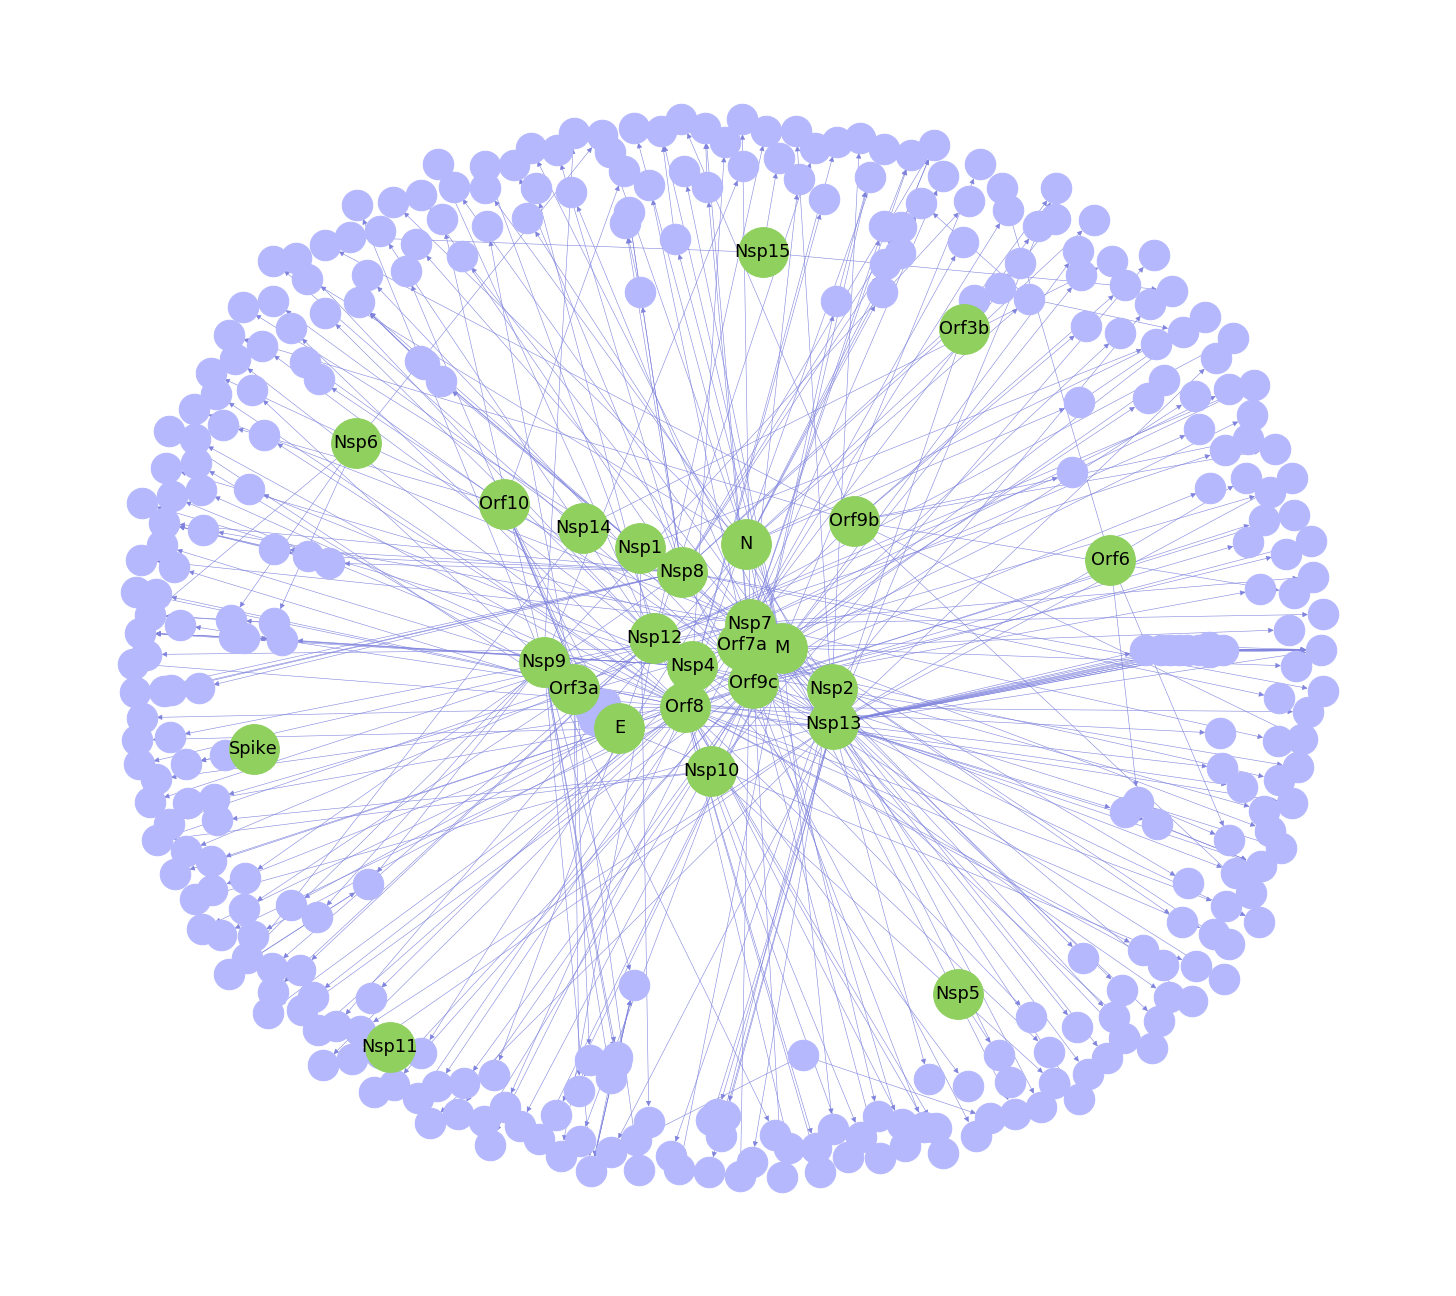

In [332]:
# draw edges a different color for covid proteins
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# plot
# pos = nx.spring_layout(hpi_map_networkx, k=0.014)
pos = nx.spring_layout(hpi_map_networkx)
nx.draw(hpi_map_networkx, pos, node_color='#B5B8FD', edge_color='#7F83DD', node_size=750, width=0.5)

# draw covid specific edges and nodes
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=all_index, node_size=2000, node_color='#8FD05F')
nx.draw_networkx_labels(hpi_bioplex, pos, labels=node, font_size=16)
plt.show()

## 5. Clique Analysis

Clique analysis was done for all of bioplex as well, but when COVID protein nodes selected resulted in basically the same cliques so a smaller network was used (i.e. only 1st degree neighbors)

Here, a cut-off for gene ontology was done at >3 proteins because 3 or less does not allow for accurate gene ontology determinations

In [116]:
all_cliques = []
for i in all_index:
    a = nx.cliques_containing_node(hpi_undirected, nodes=[i])
    for c in list(a.values()):
        for i in c:
            all_cliques.append(i)

[len(c) for c in sorted(all_cliques, key=len, reverse=True)]

sorted_cliques = sorted(all_cliques, key=len, reverse=True)

# # Clique annotations based on Gprofiler
# 0 = regulation of G2/M transition of mitotic cell cycle
# 1 tRNA export from nucleus
# 2 regulation of transcription from RNA polymerase II promoter in response to hypoxia
# 3 mitochondrial translational elongation
# 4 U4 snRNA 3'-end processing
# 5 protein insertion into mitochondrial inner membrane
# 6 telomere maintenance via semi-conservative replication
# 7 negative regulation of cAMP-dependent protein kinase activity
# 8 activation of protein kinase A activity
# 9 negative regulation of canonical Wnt signaling pathway
# 10 ribosome biogenesis
# 11 SRP-dependent cotranslational protein targeting to membrane
# 12 sequestering of TGFbeta in extracellular matrix
# 13 rRNA processing in the nucleus and cytosol
# 14 proton-transporting ATP synthase activity, rotational mechanism

# To get each clique
clique_0 = []
node_atr = nx.get_node_attributes(hpi_undirected, 'name')
for key, value in node_atr.items():
    for i in sorted_cliques[33]:
        if key == i:
            print(value)
            clique_0.append(value)  

Nsp13
FYCO1


### 5.1 All cliques

In [154]:
# for all cliques
# find which cliques COVID-associated genes are in
cliques = []
name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for i in range(len(sorted_cliques)):
    for v in range(len(index)):
        if index[v] in sorted_cliques[i]:
            start = (name[v], i)
            cliques.append(start)
            
final_clique = sorted(cliques, key=lambda x: x[1])

# count number of times each gene appears in list
flat1 = [item for sublist in final_clique for item in sublist]
print("Nsp13 is in {} cliques".format(flat1.count('Nsp13')))
print("Nsp8 is in {} cliques".format(flat1.count('Nsp8')))
print("N is in {} cliques".format(flat1.count('N')))
print("Nsp12 is in {} cliques".format(flat1.count('Nsp12')))
print("Orf8 is in {} cliques".format(flat1.count('Orf8')))
print("Nsp9 is in {} cliques".format(flat1.count('Nsp9')))
print("Nsp7 is in {} cliques".format(flat1.count('Nsp7')))
print("Nsp10 is in {} cliques".format(flat1.count('Nsp10')))
print("Nsp6 is in {} cliques".format(flat1.count('Nsp6')))
print("Nsp4 is in {} cliques".format(flat1.count('Nsp4')))
print("Nsp1 is in {} cliques".format(flat1.count('Nsp1')))
print("M is in {} cliques".format(flat1.count('M')))
print("Spike is in {} cliques".format(flat1.count('Spike')))
print("Orf10 is in {} cliques".format(flat1.count('Orf10')))
print("Orf6 is in {} cliques".format(flat1.count('Orf6')))
print("Orf3a is in {} cliques".format(flat1.count('Orf3a')))
   

Nsp13 is in 24 cliques
Nsp8 is in 13 cliques
N is in 13 cliques
Nsp12 is in 18 cliques
Orf8 is in 45 cliques
Nsp9 is in 10 cliques
Nsp7 is in 30 cliques
Nsp10 is in 4 cliques
Nsp6 is in 2 cliques
Nsp4 is in 5 cliques
Nsp1 is in 3 cliques
M is in 29 cliques
Spike is in 1 cliques
Orf10 is in 5 cliques
Orf6 is in 2 cliques
Orf3a is in 7 cliques


### 5.2 Number of Cliques with >2 proteins

In [155]:
# cliques more than 2 proteins
cliq_short = []
for i in range(len(sorted_cliques)):
    if len(sorted_cliques[i]) > 2:
        cliq_short.append(sorted_cliques[i])
len(cliq_short)
len(sorted_cliques)

271

In [156]:
# for cliques greater than 2
# find which cliques COVID-associated genes are in
cliques = []
name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for i in range(len(cliq_short)):
    for v in range(len(index)):
        if index[v] in cliq_short[i]:
            start = (name[v], i)
            cliques.append(start)
            
final_clique = sorted(cliques, key=lambda x: x[1])

# count number of times each gene appears in list
flat = [item for sublist in final_clique for item in sublist]

print("Nsp13 is in {} cliques".format(flat.count('Nsp13')))
print("Nsp8 is in {} cliques".format(flat.count('Nsp8')))
print("N is in {} cliques".format(flat.count('N')))
print("Nsp12 is in {} cliques".format(flat.count('Nsp12')))
print("Orf8 is in {} cliques".format(flat.count('Orf8')))
print("Nsp9 is in {} cliques".format(flat.count('Nsp9')))
print("Nsp7 is in {} cliques".format(flat.count('Nsp7')))
print("Nsp10 is in {} cliques".format(flat.count('Nsp10')))
print("Nsp6 is in {} cliques".format(flat.count('Nsp6')))
print("Nsp4 is in {} cliques".format(flat.count('Nsp4')))
print("Nsp1 is in {} cliques".format(flat.count('Nsp1')))
print("M is in {} cliques".format(flat.count('M')))
print("Spike is in {} cliques".format(flat.count('Spike')))
print("Orf10 is in {} cliques".format(flat.count('Orf10')))
print("Orf6 is in {} cliques".format(flat.count('Orf6')))
print("Orf3a is in {} cliques".format(flat.count('Orf3a')))

# final_clique     

Nsp13 is in 5 cliques
Nsp8 is in 5 cliques
N is in 4 cliques
Nsp12 is in 2 cliques
Orf8 is in 2 cliques
Nsp9 is in 2 cliques
Nsp7 is in 2 cliques
Nsp10 is in 1 cliques
Nsp6 is in 1 cliques
Nsp4 is in 1 cliques
Nsp1 is in 1 cliques
M is in 1 cliques
Spike is in 1 cliques
Orf10 is in 1 cliques
Orf6 is in 1 cliques
Orf3a is in 1 cliques


### 5.3 Generating a table for cliques

In [301]:
# table for cliques
clique_table = []

name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for i in range(len(name)):
    new = list([name[i], index[i], flat1.count(name[i]), flat.count(name[i])])
    clique_table.append(new)

final_clique_table = sorted(clique_table, key=lambda x: x[2], reverse=True)
    
# table
df_final_clique_table = pd.DataFrame(final_clique_table)
df_final_clique_table.columns = ['Protein','Index', 'All Cliques', '>2 Node Cliques']
df_final_clique_table
df_final_clique_table.to_csv('table2.csv')


In [183]:
a = 1
scores = []
for i in range(len(final_clique_table)):
    new = list(final_clique_table[i])
    new.append(a)
    scores.append(new)
    a+=1

scores1 = sorted(scores, key=lambda x: x[3], reverse=True)
    

a = 1
scores2 = []
for i in range(len(scores1)):
    new = list(scores1[i])
    new.append(a)
    scores2.append(new)
    a+=1
    
dfcovid_table1 = pd.DataFrame(scores2)

### 5.4 Plot network with annotated gene ontology terms

In [202]:
# pull df from all bioplex
file = pd.read_csv('df.csv')
a = file.values.tolist()

ecsort = sorted(a, key=lambda x: x[4], reverse=True)

a = 1
scores = []
for i in range(len(ecsort)):
    new = list(ecsort[i])
    new.append(a)
    scores.append(new)
    a+=1

scores1 = sorted(scores, key=lambda x: x[5], reverse=True)
    
a = 1
scores2 = []
for i in range(len(scores1)):
    new = list(scores1[i])
    new.append(a)
    scores2.append(new)
    a+=1
    
scores3 = sorted(scores2, key=lambda x: x[6], reverse=True)

a = 1
scores4 = []
for i in range(len(scores3)):
    new = list(scores3[i])
    new.append(a)
    scores4.append(new)
    a+=1
    
dfcovid_table = pd.DataFrame(scores4)
dfcovid_table.columns = ['num','Protein','Index', 'Rank', 'ec', 'bc', 'dc', 'score', 'ec_rank', 'bc_rank', 'dc_rank']
dfcovid_table1.columns = ['Protein','Index','cliq', 'cliq2', 'rank1', 'rank2']
df_merge_col = pd.merge(dfcovid_table, dfcovid_table1, on='Protein')
df_merge_col

final = []
for i in range(len(df_merge_col)):
    a = [int(df_merge_col.loc[i,'ec_rank']), int(df_merge_col.loc[i,'bc_rank']), 
                                               int(df_merge_col.loc[i,'dc_rank']), 
                                               int(df_merge_col.loc[i,'rank1']), 
                                               int(df_merge_col.loc[i,'rank2'])]
    new = list([df_merge_col.loc[i,'Protein'], df_merge_col.loc[i,'Index_x']])
    new.append(sum(a))
    final.append(new)

final_sort = sorted(final, key=lambda x: x[2])
final_sort

[['Orf8', 2363, 14],
 ['Nsp12', 2562, 18],
 ['Nsp7', 2465, 21],
 ['Orf9c', 2303, 26],
 ['Nsp13', 2541, 27],
 ['Nsp8', 2433, 34],
 ['M', 2627, 38],
 ['E', 2634, 49],
 ['Orf9b', 2315, 51],
 ['Nsp4', 2484, 53],
 ['Nsp9', 2408, 53],
 ['Orf3a', 2381, 54],
 ['N', 2596, 59],
 ['Orf10', 2391, 77],
 ['Nsp11', 2564, 82],
 ['Orf6', 2370, 84],
 ['Nsp1', 2577, 85],
 ['Orf3b', 2372, 93],
 ['Nsp2', 2492, 94],
 ['Nsp5', 2475, 100],
 ['Spike', 2580, 102],
 ['Nsp10', 2570, 103],
 ['Nsp14', 2500, 104],
 ['Nsp15', 2496, 110],
 ['Nsp6', 2470, 110],
 ['Orf7a', 2366, 114]]

In [118]:
# # remove nodes not in list
# copy network
G2 = hpi_undirected.copy()

# remove nodes not in list
nodes = sorted_cliques
flat_list = [item for sublist in nodes for item in sublist]

nodes_for_removal = []

for node in G2.nodes():
    if node not in flat_list:
        nodes_for_removal.append(node)

G2.remove_nodes_from(nodes_for_removal)

In [119]:
# pull COVID nodes
node_cov = {}
node_atr = nx.get_node_attributes(G2, 'name')
for key, value in node_atr.items():
    if key in all_index:
        node_cov.update ( {key : value} )
        
# pull other nodes
nodes_other = {}
node_atr = nx.get_node_attributes(G2, 'name')
for key, value in node_atr.items():
    if key not in all_index:
        nodes_other.update ( {key : value} )

In [120]:
# extract edges
def dictionary_extraction(alist, num):
    dic = []
    for key, value in G2.edges():
        if key in sorted_cliques[num] and value in sorted_cliques[num]:
            if key != value:
                dic.append( (key, value) )

    return dic

listof = []
for a in range(len(sorted_cliques)):
    listof.append(dictionary_extraction(nodes, a))


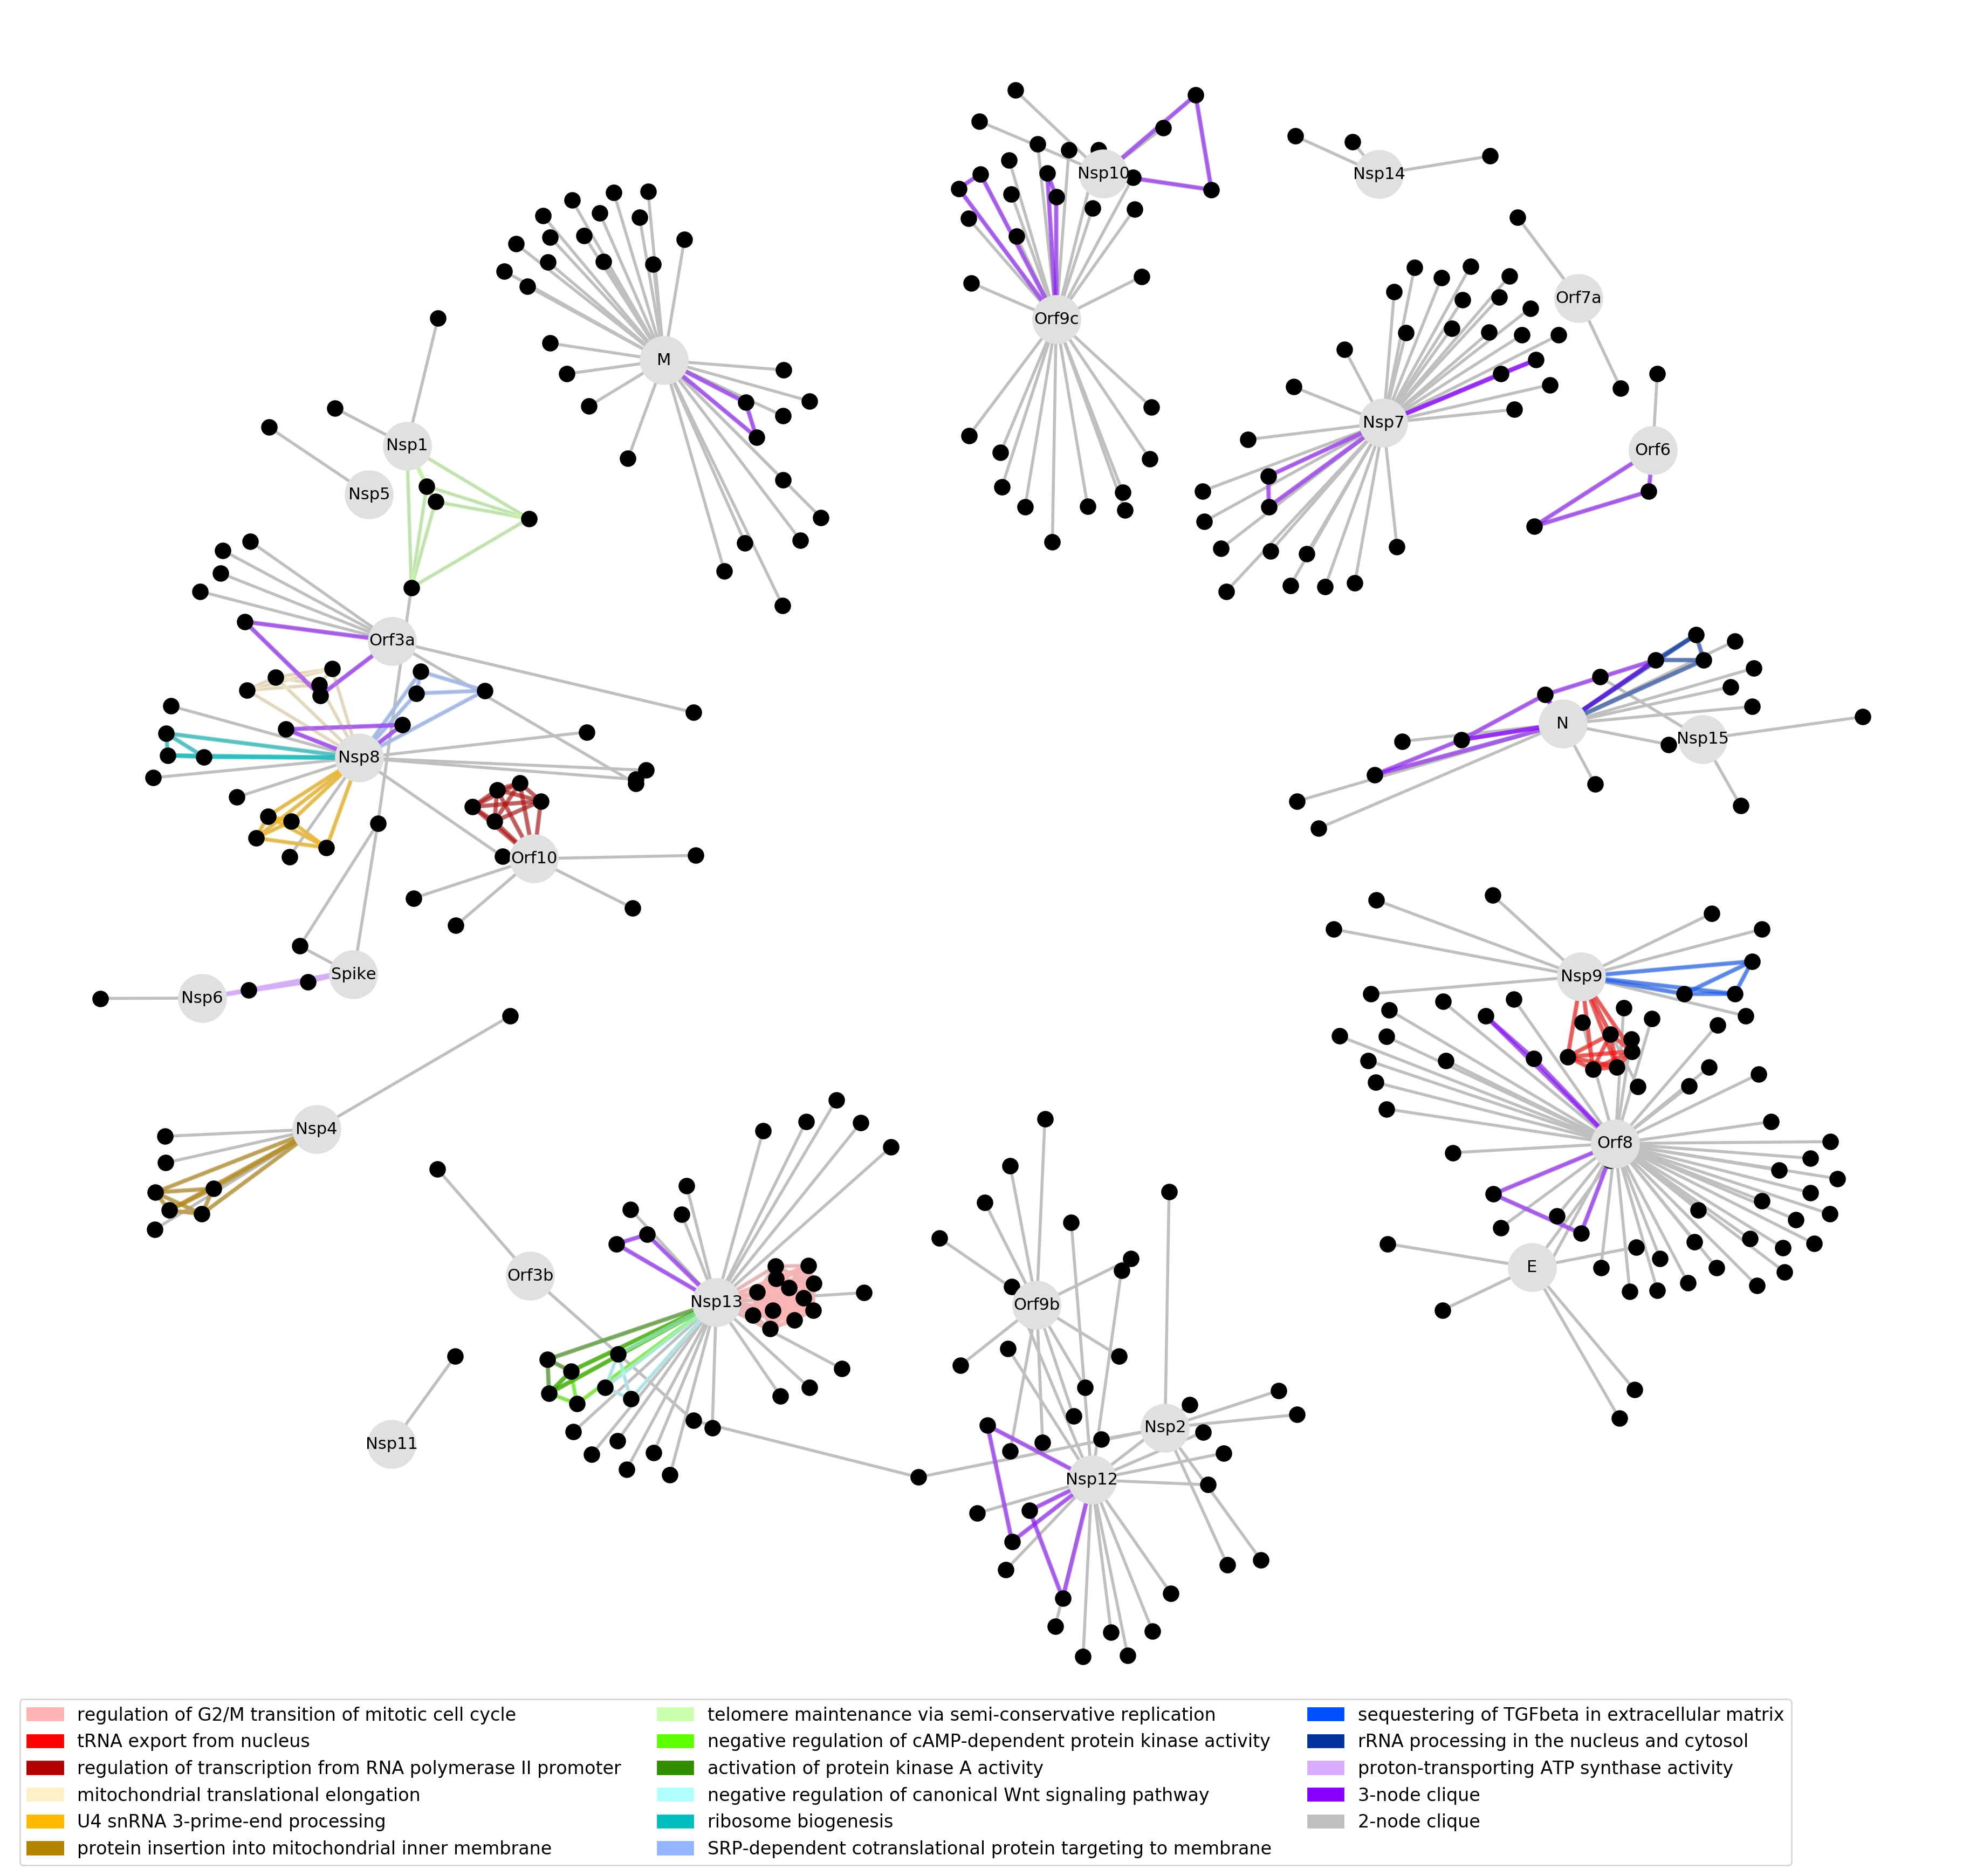

In [162]:
# draw edges a different color for covid proteins
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig=plt.figure(figsize=(18, 16), dpi=200, facecolor='w', edgecolor='k')

# plot
pos = nx.spring_layout(G2, k=0.15)
nx.draw(G2, pos, node_color='k', edge_color='#BFBFBF', node_size=100, width=2)
# nx.draw(G2, pos, node_color='#C7C7C7', edge_color='#CBCBCB', node_size=200, width=0.5)

nx.draw_networkx_edges(G2, pos, edgelist = listof[0], width=3, alpha=0.5, edge_color='#FFB4B4')
nx.draw_networkx_edges(G2, pos, edgelist = listof[1], width=3, alpha=0.5, edge_color='#FF0000')
nx.draw_networkx_edges(G2, pos, edgelist = listof[2], width=3, alpha=0.5, edge_color='#B30000')

nx.draw_networkx_edges(G2, pos, edgelist = listof[3], width=3, alpha=0.5, edge_color='#FFF0C8')
nx.draw_networkx_edges(G2, pos, edgelist = listof[4], width=3, alpha=0.5, edge_color='#FFB800')
nx.draw_networkx_edges(G2, pos, edgelist = listof[5], width=3, alpha=0.5, edge_color='#B58300')

nx.draw_networkx_edges(G2, pos, edgelist = listof[6], width=3, alpha=0.5, edge_color='#CBFFAD')
nx.draw_networkx_edges(G2, pos, edgelist = listof[7], width=3, alpha=0.5, edge_color='#5DFF00')
nx.draw_networkx_edges(G2, pos, edgelist = listof[8], width=3, alpha=0.5, edge_color='#338D00')

nx.draw_networkx_edges(G2, pos, edgelist = listof[9], width=3, alpha=0.5, edge_color='#B1FFFF')
nx.draw_networkx_edges(G2, pos, edgelist = listof[10], width=3, alpha=0.5, edge_color='#00BDBD')
nx.draw_networkx_edges(G2, pos, edgelist = listof[11], width=3, alpha=0.5, edge_color='#95B6FF')

nx.draw_networkx_edges(G2, pos, edgelist = listof[12], width=3, alpha=0.5, edge_color='#004FFF')
nx.draw_networkx_edges(G2, pos, edgelist = listof[13], width=3, alpha=0.5, edge_color='#00319D')
nx.draw_networkx_edges(G2, pos, edgelist = listof[14], width=3, alpha=0.5, edge_color='#D8ACFF')


for i in listof[15:32]:
    nx.draw_networkx_edges(G2, pos, edgelist = i, width=3, alpha=0.5, edge_color='#8700FF')


nx.draw_networkx_nodes(G2, pos, nodelist=all_index, node_size=1000, node_color='#E0E0E0', label='COV')
nx.draw_networkx_labels(G2, pos, labels=node_cov, font_size=11)
# nx.draw_networkx_labels(G2, pos, labels=nodes_other, font_size=12)

patch0 = mpatches.Patch(color='#FFB4B4', label='regulation of G2/M transition of mitotic cell cycle')
patch1 = mpatches.Patch(color='#FF0000', label='tRNA export from nucleus')
patch2 = mpatches.Patch(color='#B30000', label='regulation of transcription from RNA polymerase II promoter')
patch3 = mpatches.Patch(color='#FFF0C8', label='mitochondrial translational elongation')

patch4 = mpatches.Patch(color='#FFB800', label='U4 snRNA 3-prime-end processing')
patch5 = mpatches.Patch(color='#B58300', label='protein insertion into mitochondrial inner membrane')
patch6 = mpatches.Patch(color='#CBFFAD', label='telomere maintenance via semi-conservative replication')
patch7 = mpatches.Patch(color='#5DFF00', label='negative regulation of cAMP-dependent protein kinase activity')
patch8 = mpatches.Patch(color='#338D00', label='activation of protein kinase A activity')
patch9 = mpatches.Patch(color='#B1FFFF', label='negative regulation of canonical Wnt signaling pathway')
patch10 = mpatches.Patch(color='#00BDBD', label='ribosome biogenesis')
patch11 = mpatches.Patch(color='#95B6FF', label='SRP-dependent cotranslational protein targeting to membrane')
patch12 = mpatches.Patch(color='#004FFF', label='sequestering of TGFbeta in extracellular matrix')
patch13 = mpatches.Patch(color='#00319D', label='rRNA processing in the nucleus and cytosol')
patch14 = mpatches.Patch(color='#D8ACFF', label='proton-transporting ATP synthase activity')
patch15 = mpatches.Patch(color='#8700FF', label='3-node clique')
patch16 = mpatches.Patch(color='#BFBFBF', label='2-node clique')

plt.legend(handles=[patch0, patch1, patch2, patch3, patch4, patch5, patch6, patch7, 
                   patch8, patch9, patch10, patch11, patch12, patch13, patch14, patch15, 
                   patch16], 
          loc='lower left', bbox_to_anchor = (0,-0.08), fancybox=True, 
          fontsize=12, ncol = 3)

plt.show()

## 6. Clustering using connected components

### 6.1 Cluster using only human-CoV dataset

In [87]:
# make networkx object
hpi_map_networkx=hpi_map.to_networkx(mode='default')

# make it undirected
hpi_undirected1 = nx.Graph(hpi_map_networkx)

In [88]:
connected = nx.connected_components(hpi_undirected1)

connect = []
for c in connected:
    if len(c) > 1:
        connect.append(c)
[len(c) for c in sorted(nx.connected_components(hpi_undirected1), key=len, reverse=True)]
sorted_con = sorted(nx.connected_components(hpi_undirected1), key=len, reverse=True)

# used http://biit.cs.ut.ee/gprofiler/gost
# for GO terms, used BP and pulled 1st term

# # To get the different clusters .. 
# connect_0 = []
# node_atr = nx.get_node_attributes(hpi_undirected, 'name')
# for key, value in node_atr.items():
#     for i in sorted_con[9]:
#         if key == i:
#             print(value)
#             connect_0.append(value)        

In [89]:
# find which clusters COVID-associated genes are in
clusters = []
name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for v in range(len(index)):
    for i in range(len(sorted_con)):
        if index[v] in sorted_con[i]:
            start = (name[v], i)
            clusters.append(start)
            
sorted(clusters, key=lambda x: x[1])

[('Orf8', 0),
 ('Nsp13', 1),
 ('Nsp7', 2),
 ('M', 3),
 ('Orf9c', 4),
 ('Nsp8', 5),
 ('Nsp12', 6),
 ('Nsp9', 7),
 ('N', 8),
 ('Orf9b', 9),
 ('Orf10', 10),
 ('Nsp4', 11),
 ('Orf3a', 12),
 ('Nsp2', 13),
 ('E', 14),
 ('Nsp1', 15),
 ('Nsp10', 16),
 ('Nsp6', 17),
 ('Nsp14', 18),
 ('Nsp15', 19),
 ('Orf6', 20),
 ('Spike', 21),
 ('Orf7a', 23),
 ('Nsp11', 24),
 ('Nsp5', 25),
 ('Orf3b', 26)]

Outcome: All CoV proteins are in different components. All components are very small, i.e. under 3 proteins.

### 6.2 Clustering using human-CoV dataset + first degree neighbors

#### 6.2.1 Generation of first degree neighbors

In [10]:
def trim(G, seed):
    node_atr = nx.get_node_attributes(G, 'name')
    new_graph = []
    neigh_list = []

    # if seed protein is found, find neighbors
    for key, value in node_atr.items():
        if value == seed:
            neigh = nx.neighbors(G, key)
            neigh_list = [n for n in neigh]
    
    # add neighbors to [new_graph]
    for n in neigh_list:
        new_graph.append(n)
                    
    # copy network
    G2 = G.copy()
    
    # remove nodes not in list
    nodes_for_removal = []
    
    for node in G2.nodes():
        if node not in new_graph:
            nodes_for_removal.append(node)
            
    G2.remove_nodes_from(nodes_for_removal)
    
    # gives the new subgraph
    return G2

# pull values to find neighbors for
hpi_node_atr = nx.get_node_attributes(hpi_map_networkx, 'name')
values = []
for key, value in hpi_node_atr.items():
    values.append(value)

# make a merged networkx graph of all neighbors
new = nx.empty_graph(0,create_using=nx.MultiDiGraph())
for v in values:
    subgraph = trim(bioplex_networkx_directed, v)
    new = nx.compose(new, subgraph)  

In [11]:
# merge bioplex neighbors with hpi network
hpi_bioplex = nx.compose(new, hpi_map_networkx)

print(len(hpi_bioplex.nodes()))

# make it undirected
hpi_undirected = nx.Graph(hpi_bioplex)

1187


#### 6.2.2 Analysis

In [6]:
hpi_bioplex_und = nx.MultiGraph(hpi_bioplex)
connected = nx.connected_components(hpi_bioplex_und)

connect = []
# for c in connected:
#     if len(c) > 1:
#         connect.append(c)
a = [len(c) for c in sorted(nx.connected_components(hpi_bioplex_und), key=len, reverse=True)]
sorted_con = sorted(nx.connected_components(hpi_bioplex_und), key=len, reverse=True)

# # to find number of components and mean of length
# for i in range(len(a)):
#     if a[i] > 1:
#         connect.append(a[i])
        
# print(len(connect))
# print(np.mean(connect))

# used http://biit.cs.ut.ee/gprofiler/gost
# for GO terms, used BP and pulled 1st term


# 10 Acetylation, 26 Endocytosis, 38 ribosomal large subunit biogenesis, 55 

# connect_0 = []
# node_atr = nx.get_node_attributes(hpi_bioplex_und, 'name')
# for key, value in node_atr.items():
#     for i in sorted_con[55]:
#         if key == i:
#             print(value)
#             connect_0.append(value)  


In [932]:
# find which clusters COVID-associated genes are in
clusters = []
name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for v in range(len(index)):
    for i in range(len(sorted_con)):
        if index[v] in sorted_con[i]:
            start = (name[v], i)
            clusters.append(start)
            
sorted(clusters, key=lambda x: x[1])

[('Nsp7', 0),
 ('M', 1),
 ('Orf8', 2),
 ('Nsp13', 3),
 ('Nsp12', 4),
 ('Nsp8', 6),
 ('Nsp9', 7),
 ('N', 8),
 ('Nsp2', 10),
 ('Orf9b', 12),
 ('Nsp4', 13),
 ('Orf10', 14),
 ('Orf3a', 15),
 ('Nsp1', 17),
 ('Spike', 17),
 ('E', 18),
 ('Nsp10', 22),
 ('Nsp6', 23),
 ('Nsp14', 25),
 ('Nsp15', 26),
 ('Orf6', 27),
 ('Orf7a', 38),
 ('Nsp5', 55)]

#### 6.2.3 Generate Plot for 1st degree neighbors with Clustering

In [933]:
# all_index = list(dfcovid_table.loc[:,'Index'])
# all_name = list(dfcovid_table.loc[:,'Protein'])

# extract edges
def dictionary_extraction(alist, num):
    edge_atr = nx.get_edge_attributes(hpi_bioplex, 'name')
    dic = {}
    for key, value in edge_atr.items():
        for i in sorted_con[num]:
            if i in key:
                dic.update( {key : value} ) 

    return dic

listof = []
for a in range(len(sorted_con)):
    listof.append(dictionary_extraction(sorted_con, a))
            
# relabel
node_atr = nx.get_node_attributes(hpi_bioplex, 'name')
node = {}
nodes_list = []
for key, value in node_atr.items():
    for i in all_name:
        if i == value:
            nodes_list.append(key)
            node.update( {key : value} ) 

# pull nodes
hpi_map_networkx_lesser=hpi_bioplex.copy()
hpi_map_networkx_lesser.remove_nodes_from(node)

node_atr = nx.get_node_attributes(hpi_map_networkx_lesser, 'name')
other_nodes = []
for key, value in node_atr.items():
        other_nodes.append(key)

# make nlist
final = []
final.append(nodes_list)
final.append(other_nodes)

In [952]:
# relabel

flat_list = [item for sublist in sorted_con for item in sublist]

node_atr = nx.get_node_attributes(hpi_bioplex, 'name')
con_node = {}
for key, value in node_atr.items():
    for i in flat_list:
        if i == key:
            if key not in all_index:
                con_node.update( {key : value} ) 
                       

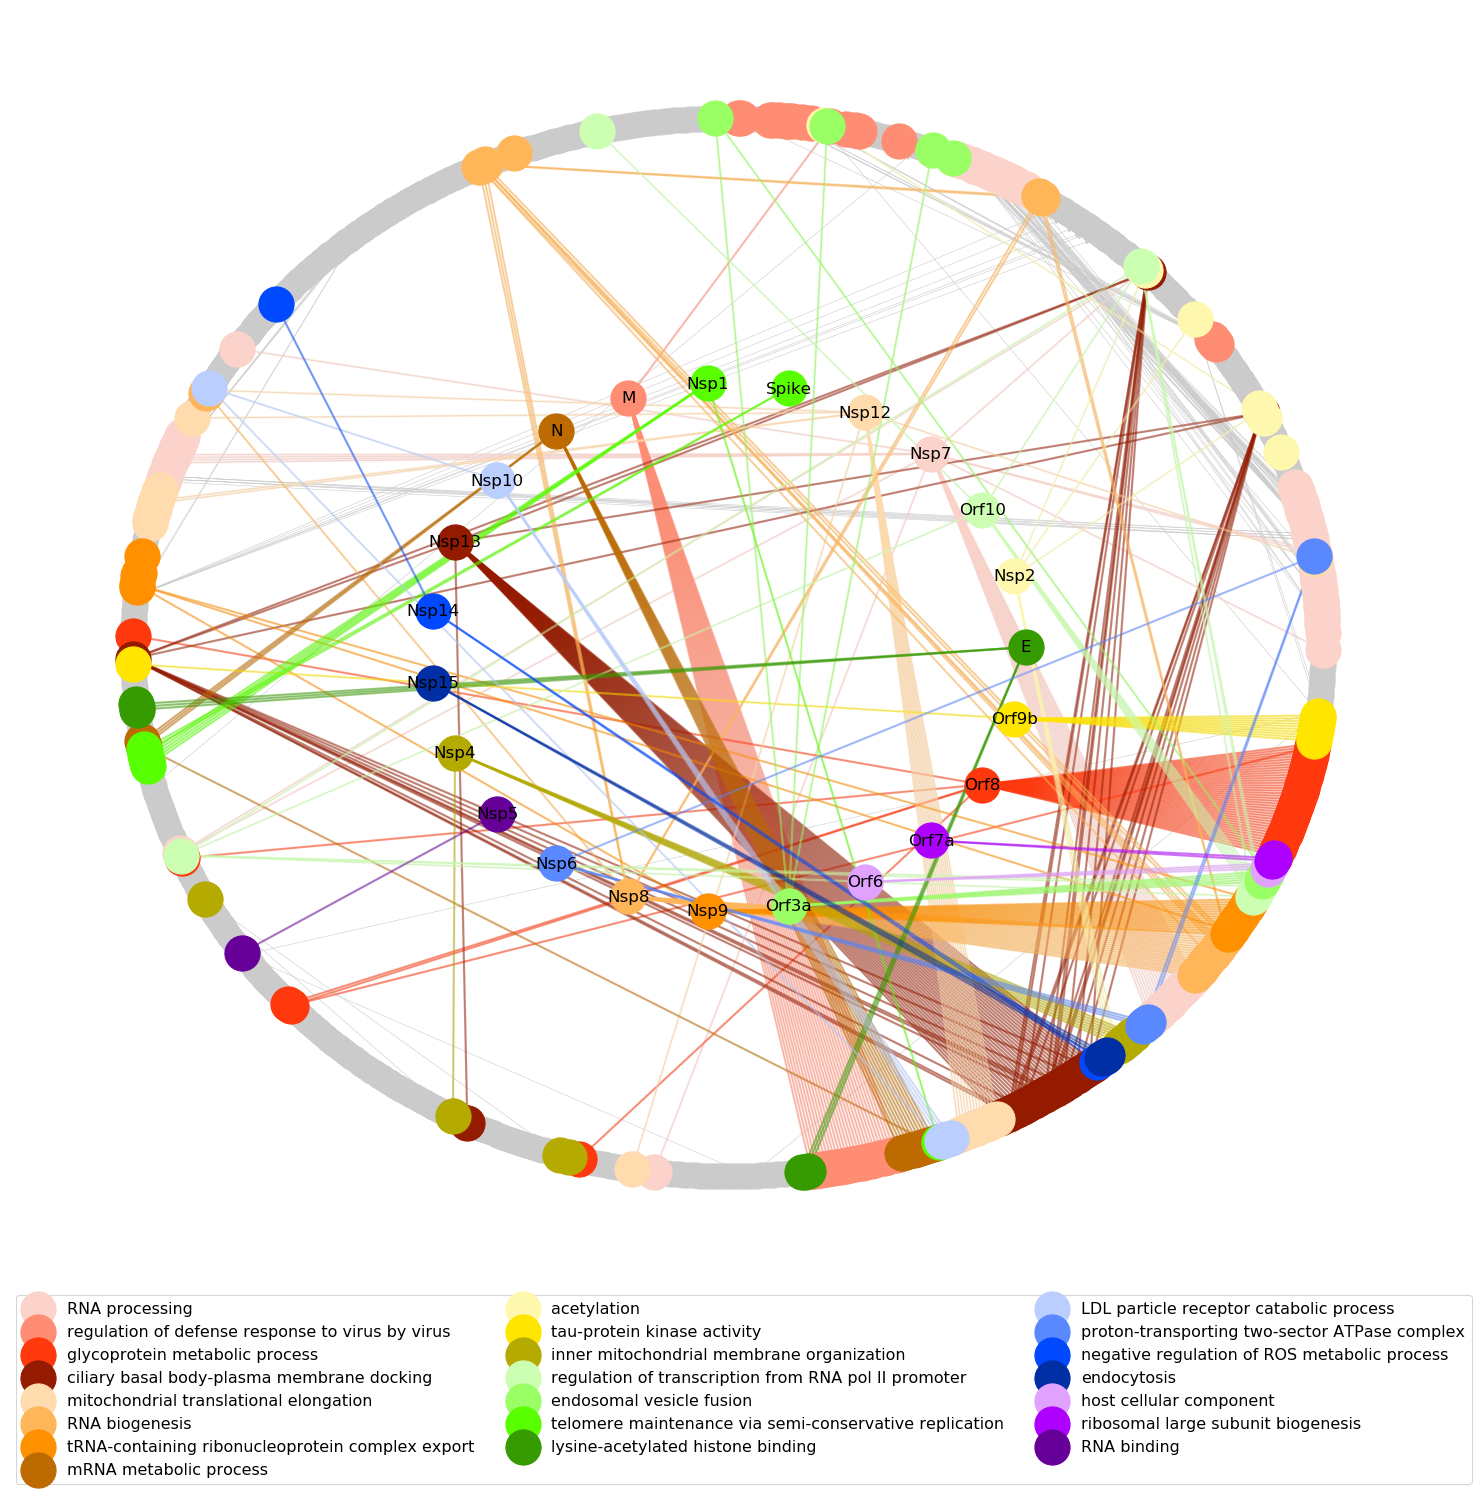

In [983]:
# draw edges a different color for covid proteins
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# plot
# pos = nx.spring_layout(hpi_bioplex, k=0.1)
pos = nx.shell_layout(hpi_bioplex, nlist = final)
# pos = nx.bipartite_layout(hpi_bioplex, all_index)
nx.draw(hpi_bioplex, pos, node_color='#CBCBCB', edge_color='#CBCBCB', node_size=500, width=0.5)

# draw covid specific edges and nodes
nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[0], width=2, alpha=0.5, edge_color='#FCD3CA')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[0], node_size=1000, node_color='#FCD3CA', label='RNA processing')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[1], width=2, alpha=0.5, edge_color='#FF8D74')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[1], node_size=1000, node_color='#FF8D74', label='regulation of defense response to virus by virus')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[2], width=2, alpha=0.5, edge_color='#FF380D')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[2], node_size=1000, node_color='#FF380D', label='glycoprotein metabolic process')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[3], width=2, alpha=0.5, edge_color='#951B00')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[3], node_size=1000, node_color='#951B00', label='ciliary basal body-plasma membrane docking')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[4], width=2, alpha=0.5, edge_color='#FFDBAD')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[4], node_size=1000, node_color='#FFDBAD', label='mitochondrial translational elongation')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[6], width=2, alpha=0.5, edge_color='#FFB659')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[6], node_size=1000, node_color='#FFB659', label='RNA biogenesis')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[7], width=2, alpha=0.5, edge_color='#FF9000')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[7], node_size=1000, node_color='#FF9000', label='tRNA-containing ribonucleoprotein complex export')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[8], width=2, alpha=0.5, edge_color='#BD6B00')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[8], node_size=1000, node_color='#BD6B00', label='mRNA metabolic process')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[10], width=2, alpha=0.5, edge_color='#FEF8AF')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[10], node_size=1000, node_color='#FEF8AF', label='acetylation')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[12], width=2, alpha=0.5, edge_color='#FFE500')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[12], node_size=1000, node_color='#FFE500', label='tau-protein kinase activity')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[13], width=2, alpha=0.5, edge_color='#B4AA00')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[13], node_size=1000, node_color='#B4AA00', label='inner mitochondrial membrane organization')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[14], width=2, alpha=0.5, edge_color='#CDFFB3')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[14], node_size=1000, node_color='#CDFFB3', label='regulation of transcription from RNA pol II promoter')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[15], width=2, alpha=0.5, edge_color='#99FF64')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[15], node_size=1000, node_color='#99FF64', label='endosomal vesicle fusion')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[17], width=2, alpha=0.5, edge_color='#58FF00')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[17], node_size=1000, node_color='#58FF00', label='telomere maintenance via semi-conservative replication')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[18], width=2, alpha=0.5, edge_color='#369B00')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[18], node_size=1000, node_color='#369B00', label='lysine-acetylated histone binding')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[22], width=2, alpha=0.5, edge_color='#BACEFF')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[22], node_size=1000, node_color='#BACEFF', label='LDL particle receptor catabolic process')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[23], width=2, alpha=0.5, edge_color='#5988FF')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[23], node_size=1000, node_color='#5988FF', label='proton-transporting two-sector ATPase complex')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[25], width=2, alpha=0.5, edge_color='#0049FF')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[25], node_size=1000, node_color='#0049FF', label='negative regulation of ROS metabolic process')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[26], width=2, alpha=0.5, edge_color='#002FA5')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[26], node_size=1000, node_color='#002FA5', label='endocytosis')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[27], width=2, alpha=0.5, edge_color='#E1A1FF')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[27], node_size=1000, node_color='#E1A1FF', label='host cellular component')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[38], width=2, alpha=0.5, edge_color='#AD00FF')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[38], node_size=1000, node_color='#AD00FF', label='ribosomal large subunit biogenesis')

nx.draw_networkx_edges(hpi_bioplex, pos, edgelist = listof[55], width=2, alpha=0.5, edge_color='#670098')
nx.draw_networkx_nodes(hpi_bioplex, pos, nodelist=sorted_con[55], node_size=1000, node_color='#670098', label='RNA binding')
nx.draw_networkx_labels(hpi_bioplex, pos, labels=node, font_size=15)
# nx.draw_networkx_labels(hpi_bioplex, pos, labels=con_node, font_size=12)

plt.legend(numpoints = 1, loc = 'upper left', fontsize = "x-large", ncol = 3, bbox_to_anchor=(0, 0))
plt.show()

### 6.3 Try clustering with human-CoV dataset + 1st degree + 2nd neighbors

#### 6.3.1 Find 2nd degree neighbors

In [7]:
def trim(G, seed):
    node_atr = nx.get_node_attributes(G, 'name')
    new_graph = []
    neigh_list = []

    # if seed protein is found, find neighbors
    for key, value in node_atr.items():
        if value == seed:
            neigh = nx.neighbors(G, key)
            neigh_list = [n for n in neigh]
    
    # add neighbors to [new_graph]
    for n in neigh_list:
        new_graph.append(n)
    
        
    # for neighbors of seed protein, find their neighbors
    for i in neigh_list:
        neigh2 = nx.neighbors(G, i)
        neigh_val2 = [n for n in neigh2]

        for n in neigh_val2:
            if n not in new_graph:
                new_graph.append(n)
    
    # copy network
    G2 = G.copy()
    
    # remove nodes not in list
    nodes_for_removal = []
    
    for node in G2.nodes():
        if node not in new_graph:
            nodes_for_removal.append(node)
            
    G2.remove_nodes_from(nodes_for_removal)
    
    # gives the new subgraph
    return G2

# pull values to find neighbors for
hpi_node_atr = nx.get_node_attributes(hpi_map_networkx, 'name')
values = []
for key, value in hpi_node_atr.items():
    values.append(value)

# make a merged networkx graph of all neighbors
new = nx.empty_graph(0,create_using=nx.MultiDiGraph())
for v in values:
    subgraph = trim(bioplex_networkx_directed, v)
    new = nx.compose(new, subgraph)  


In [8]:
# merge bioplex neighbors with hpi network
hpi_bioplex2 = nx.compose(new, hpi_map_networkx)

# print(len(hpi_bioplex2.nodes()))

In [897]:
hpi_bioplex_und = nx.MultiGraph(hpi_bioplex)
connected = nx.connected_components(hpi_bioplex_und)

connect = []
# for c in connected:
#     if len(c) > 1:
#         connect.append(c)
a = [len(c) for c in sorted(nx.connected_components(hpi_bioplex_und), key=len, reverse=True)]
sorted_con = sorted(nx.connected_components(hpi_bioplex_und), key=len, reverse=True)

for i in range(len(a)):
    if a[i] > 1:
        connect.append(a[i])
        
print(len(connect))
print(np.mean(connect))

# find which clusters COVID-associated genes are in
clusters = []
name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for v in range(len(index)):
    for i in range(len(sorted_con)):
        if index[v] in sorted_con[i]:
            start = (name[v], i)
            clusters.append(start)
            
sorted(clusters, key=lambda x: x[1])

[('Nsp12', 0),
 ('Nsp7', 0),
 ('M', 0),
 ('N', 0),
 ('Orf3a', 0),
 ('Nsp13', 0),
 ('Nsp1', 0),
 ('Nsp9', 0),
 ('Nsp2', 0),
 ('Orf9b', 0),
 ('Orf8', 0),
 ('Nsp8', 0),
 ('Orf10', 0),
 ('Nsp4', 0),
 ('E', 0),
 ('Nsp10', 0),
 ('Nsp6', 0),
 ('Nsp15', 0),
 ('Nsp14', 0),
 ('Orf7a', 0),
 ('Spike', 0),
 ('Nsp5', 0),
 ('Orf6', 6)]

Outcome: Unsuccessful since all cluster for cluster 0, which has >2000 genes and other clusters have under 10

### 6.4 Try clustering with human-CoV dataset + 1st degree + 2nd degree + 3rd degree Neighbors

#### 6.3.1 Find 3rd degree neighbors

In [898]:
def trim(G, seed):
    node_atr = nx.get_node_attributes(G, 'name')
    new_graph = []
    neigh_list = []

    # if seed protein is found, find neighbors
    for key, value in node_atr.items():
        if value == seed:
            neigh = nx.neighbors(G, key)
            neigh_list = [n for n in neigh]
    
    # add neighbors to [new_graph]
    for n in neigh_list:
        new_graph.append(n)
    
        
    # 2nd degree
    neigh_val2 = []
    for i in neigh_list:
        neigh2 = nx.neighbors(G, i)
        neigh_val2 = [n for n in neigh2]

        for n in neigh_val2:
            if n not in new_graph:
                new_graph.append(n)
                
    # 3rd degree
    for i in neigh_val2:
        neigh3 = nx.neighbors(G, i)
        neigh_val3 = [n for n in neigh3]

        for n in neigh_val3:
            if n not in new_graph:
                new_graph.append(n)
    
    # copy network
    G2 = G.copy()
    
    # remove nodes not in list
    nodes_for_removal = []
    
    for node in G2.nodes():
        if node not in new_graph:
            nodes_for_removal.append(node)
            
    G2.remove_nodes_from(nodes_for_removal)
    
    # gives the new subgraph
    return G2

# pull values to find neighbors for
hpi_node_atr = nx.get_node_attributes(hpi_map_networkx, 'name')
values = []
for key, value in hpi_node_atr.items():
    values.append(value)

# make a merged networkx graph of all neighbors
new = nx.empty_graph(0,create_using=nx.MultiDiGraph())
for v in values:
    subgraph = trim(bioplex_networkx_directed, v)
    new = nx.compose(new, subgraph)  


In [899]:
# merge bioplex neighbors with hpi network
hpi_bioplex = nx.compose(new, hpi_map_networkx)

print(len(hpi_bioplex.nodes()))

3127


#### 6.3.2 Find connected components

In [900]:
hpi_bioplex_und = nx.MultiGraph(hpi_bioplex)
connected = nx.connected_components(hpi_bioplex_und)

connect = []
for c in connected:
    if len(c) > 1:
        connect.append(c)
[len(c) for c in sorted(nx.connected_components(hpi_bioplex_und), key=len, reverse=True)]
sorted_con = sorted(nx.connected_components(hpi_bioplex_und), key=len, reverse=True)

# find which clusters COVID-associated genes are in
clusters = []
name = dfcovid_table.loc[:,'Protein']
index = dfcovid_table.loc[:,'Index']
for v in range(len(index)):
    for i in range(len(sorted_con)):
        if index[v] in sorted_con[i]:
            start = (name[v], i)
            clusters.append(start)
            
sorted(clusters, key=lambda x: x[1])

[('Nsp12', 0),
 ('Nsp7', 0),
 ('M', 0),
 ('N', 0),
 ('Orf3a', 0),
 ('Nsp13', 0),
 ('Nsp1', 0),
 ('Nsp9', 0),
 ('Nsp2', 0),
 ('Orf9b', 0),
 ('Orf8', 0),
 ('Nsp8', 0),
 ('Orf10', 0),
 ('Nsp4', 0),
 ('E', 0),
 ('Nsp10', 0),
 ('Nsp6', 0),
 ('Nsp15', 0),
 ('Nsp14', 0),
 ('Orf7a', 0),
 ('Spike', 0),
 ('Nsp5', 0),
 ('Orf6', 3)]

Outcome: same as 2nd degree neighbors. Overall, connected component analysis is unsuccessful. Strongly connected component analysis also tried with same result.

## 7. Determine best gene to target based on centrality and clustering 

In [269]:
cov[['Gene1','Gene2']] = cov.Gene.str.split("/",expand=True)
cov[['Nsp1','Nsp2']] = cov.Nsp.str.split("/",expand=True)
cov

Name       Region  Length        Gene  \
0    SARS-CoV-2-conserved-unstructured-1  27359-27407      49  Orf6/Orf7a   
1    SARS-CoV-2-conserved-unstructured-2  25408-25442      35       Orf3a   
2    SARS-CoV-2-conserved-unstructured-3  15137-15175      39      Orf1ab   
3    SARS-CoV-2-conserved-unstructured-4    9497-9544      48      Orf1ab   
4    SARS-CoV-2-conserved-unstructured-5  29348-29394      47           N   
..                                   ...          ...     ...         ...   
73  SARS-CoV-2-conserved-unstructured-74    4551-4597      47      Orf1ab   
74  SARS-CoV-2-conserved-unstructured-75    7419-7453      35      Orf1ab   
75  SARS-CoV-2-conserved-unstructured-76    7337-7409      73      Orf1ab   
76  SARS-CoV-2-conserved-unstructured-77  23654-23721      68       Spike   
77  SARS-CoV-2-conserved-unstructured-78  15026-15082      57      Orf1ab   

      Nsp  Avg unpaired probability  Min unpaired probability  \
0     NaN                  0.828686                  0.645330   
1     NaN                  0.797974                  0.641586   
2   Nsp12                  0.800312                  0.622881   
3    Nsp4                  0.785620                  0.603424   
4     NaN                  0.922912                  0.602905   
..    ...                       ...                       ...   
73   Nsp3                  0.766988                  0.500261   
74   Nsp3                  0.714621                  0.500227   
75   Nsp3                  0.740859                  0.500083   
76    NaN                  0.815099                  0.500077   
77  Nsp12                  0.751956                  0.500069   

    Human off-targets                                           Sequence  \
0                 NaN  ATGAAGAGCAACCAATGGAGATTGATTAAACGAACATGAAAATTATTCT   
1                 NaN                AGAATCTTCACAATTGGAACTGTAACTTTGAAGCA   
2                 NaN            TGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAA   
3                 NaN   GTTGCCTTTAATACTTTACTATTCCTTATGTCATTCACTGTACTCTGT   
4                 NaN    GCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAA   
..                ...                                                ...   
73                NaN    CAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACT   
74                NaN                TCTTCTTTGCATCATTTTATTATGTATGGAAAAGT   
75                NaN  TTTATTAGTAATTCTTGGCTTATGTGGTTAATAATTAATCTTGTAC...   
76                NaN  TCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTG...   
77                NaN  CATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCT...   

     Gene1  Gene2   Nsp1  Nsp2  
0     Orf6  Orf7a    NaN   NaN  
1    Orf3a   None    NaN   NaN  
2   Orf1ab   None  Nsp12  None  
3   Orf1ab   None   Nsp4  None  
4        N   None    NaN   NaN  
..     ...    ...    ...   ...  
73  Orf1ab   None   Nsp3  None  
74  Orf1ab   None   Nsp3  None  
75  Orf1ab   None   Nsp3  None  
76   Spike   None    NaN   NaN  
77  Orf1ab   None  Nsp12  None  

[78 rows x 13 columns]

### 7.1 Make a ranking including clique analysis and centrality scores

In [321]:
### pull df from all bioplex
file = pd.read_csv('df.csv')
a = file.values.tolist()

ecsort = sorted(a, key=lambda x: x[4], reverse=True)

a = 1
scores = []
for i in range(len(ecsort)):
    new = list(ecsort[i])
    new.append(a)
    scores.append(new)
    a+=1

scores1 = sorted(scores, key=lambda x: x[5], reverse=True)
    
a = 1
scores2 = []
for i in range(len(scores1)):
    new = list(scores1[i])
    new.append(a)
    scores2.append(new)
    a+=1
    
scores3 = sorted(scores2, key=lambda x: x[6], reverse=True)

a = 1
scores4 = []
for i in range(len(scores3)):
    new = list(scores3[i])
    new.append(a)
    scores4.append(new)
    a+=1
    
dfcovid_table = pd.DataFrame(scores4)
dfcovid_table.columns = ['num','Protein','Index', 'Rank', 'ec', 'bc', 'dc', 'score', 'ec_rank', 'bc_rank', 'dc_rank']
dfcovid_table1.columns = ['Protein','Index','cliq', 'cliq2', 'rank1', 'rank2']
df_merge_col = pd.merge(dfcovid_table, dfcovid_table1, on='Protein')
df_merge_col

final = []
for i in range(len(df_merge_col)):
    a = [int(df_merge_col.loc[i,'ec_rank']), int(df_merge_col.loc[i,'bc_rank']), 
                                               int(df_merge_col.loc[i,'dc_rank']), 
                                               int(df_merge_col.loc[i,'rank1']), 
                                               int(df_merge_col.loc[i,'rank2'])]
    new = list([df_merge_col.loc[i,'Protein'], df_merge_col.loc[i,'Index_x'], 
               int(df_merge_col.loc[i,'ec_rank']), int(df_merge_col.loc[i,'bc_rank']), 
                int(df_merge_col.loc[i,'dc_rank']), int(df_merge_col.loc[i,'rank1']),
                int(df_merge_col.loc[i,'rank2'])])
    new.append(sum(a))
    final.append(new)

final_sort = sorted(final, key=lambda x: x[7])

a = 1
finalz = []
for i in range(len(final_sort)):
    new = list(final_sort[i])
    new.append(a)
    finalz.append(new)
    a+=1

# make list of all of genes
list_all =  (list(cov.loc[:,'Gene1']), list(cov.loc[:,'Gene2']), list(cov.loc[:,'Nsp1']), list(cov.loc[i:,'Nsp2']))
flatlist = [item for sublist in list_all for item in sublist]
# print(flatlist)

# add RNA count    
finalz_rna = []
for i in range(len(finalz)):
    new = list(finalz[i])
    new.append(flatlist.count(finalz[i][0]))
    finalz_rna.append(new)
    
finalz_rna = []
for i in range(len(finalz)):
    new = list(finalz[i])
    new.append(flatlist.count(finalz[i][0]))
    finalz_rna.append(new)

df = pd.DataFrame(finalz_rna)
df.columns = ['Protein','Index','Eigenvector Centrality Rank', 
              'Betweenness Centrality Rank', 'Degree Centrality Rank',
             'All Clique Rank', '>2 Node Clique Rank', 'Overall Score', 'Overall Rank', 'RNA count']
df
# df.to_csv('table3_mod.csv')
